# Proyecto 1 de Ciencia sde Datos con Python
## Regression de una variable

In [108]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [28]:
# Get the current working directory
current_directory = os.getcwd()

# Print the current directory
print(current_directory)

c:\Users\noem9\Documents\Maestria Data Science\Python\ClasePythonMaster\proyecto_data


In [52]:
#os.chdir('proyecto_data')
data1 = np.load('proyecto_training_data.npy')
df = pd.DataFrame(data1)
type(df)

pandas.core.frame.DataFrame

In [58]:
#Vamos a renombrar las columnas
df.rename(columns={0:'SalePrice',1:'OverallQual',2:'1stFlrSF',3:'TotRmsAbvGrd',4:'YearBuilt',5:'LotFrontage'}, inplace=True)
df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [31]:
#Vamos a particionar el array en subsets de entrenamiento y prueba
subset = int(len(data1) * 0.8)
print(subset)
train = data1[:subset]
test = data1[subset:]

1168


In [32]:
#Analisis exploratorio de los datos

# Media
column_media = np.mean(data1, axis=0)

# Mediana
column_mediana = np.median(data1, axis=0)

# Desviacion Estandar
column_stds = np.std(data1, axis=0)

# Minimo
column_mins = np.min(data1, axis=0)

# Maximo
column_maxs = np.max(data1, axis=0)

# Rango (peak-to-peak) 
column_ranges = np.ptp(data1, axis=0)

# Print the results
print("Column media:", column_media)
print("Column mediana:", column_mediana)
print("Column standard deviations:", column_stds)
print("Column minimo:", column_mins)
print("Column maximo:", column_maxs)
print("Column rango:", column_ranges)

Column media: [1.80921196e+05 6.09931507e+00 1.16262671e+03 6.51780822e+00
 1.97126781e+03            nan]
Column mediana: [1.630e+05 6.000e+00 1.087e+03 6.000e+00 1.973e+03       nan]
Column standard deviations: [7.94152919e+04 1.38252284e+00 3.86455322e+02 1.62483655e+00
 3.01925588e+01            nan]
Column minimo: [3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.872e+03       nan]
Column maximo: [7.550e+05 1.000e+01 4.692e+03 1.400e+01 2.010e+03       nan]
Column rango: [7.201e+05 9.000e+00 4.358e+03 1.200e+01 1.380e+02       nan]


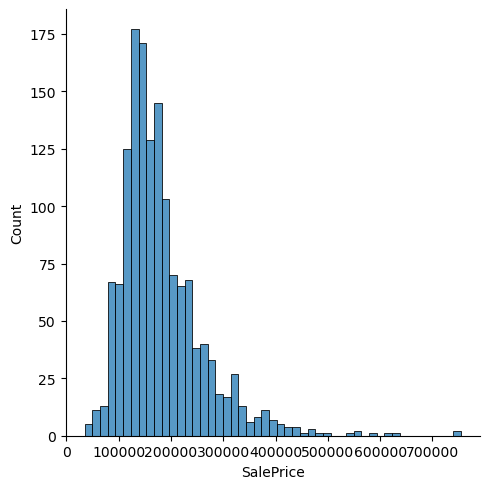

In [59]:
#Sacar histogramas de cada variable
sns.displot(df['SalePrice'], kde=False)

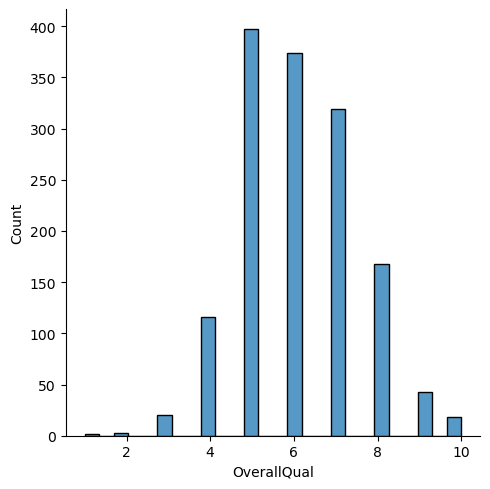

In [60]:
sns.displot(df['OverallQual'], kde=False)

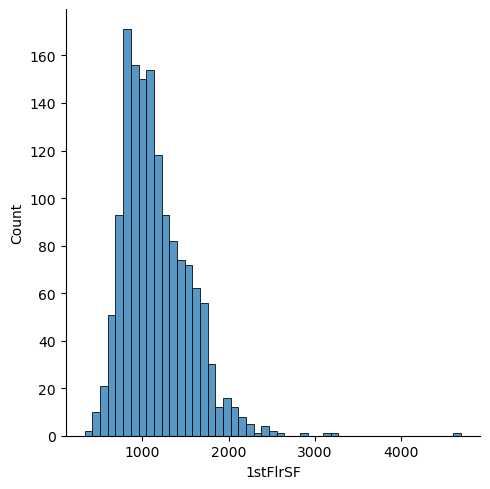

In [61]:
sns.displot(df['1stFlrSF'], kde=False)

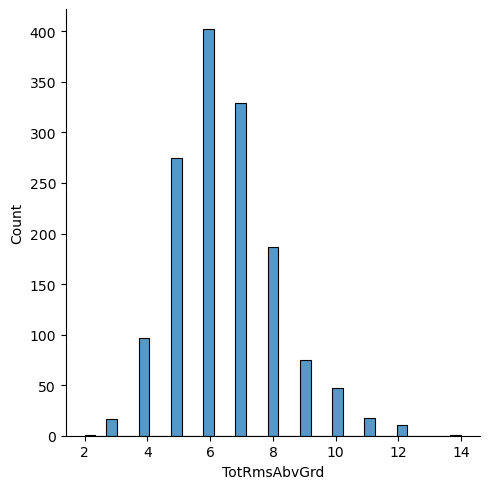

In [62]:
sns.displot(df['TotRmsAbvGrd'], kde=False)

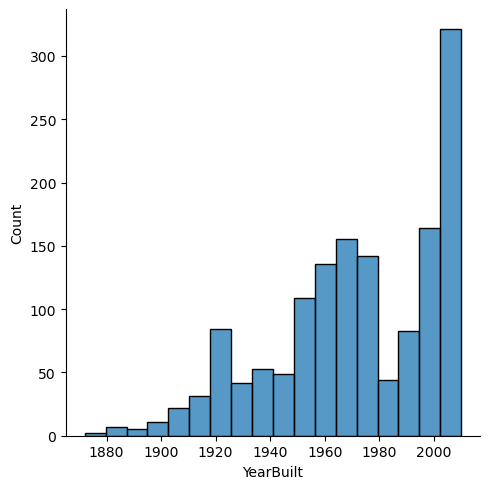

In [63]:
sns.displot(df['YearBuilt'], kde=False)

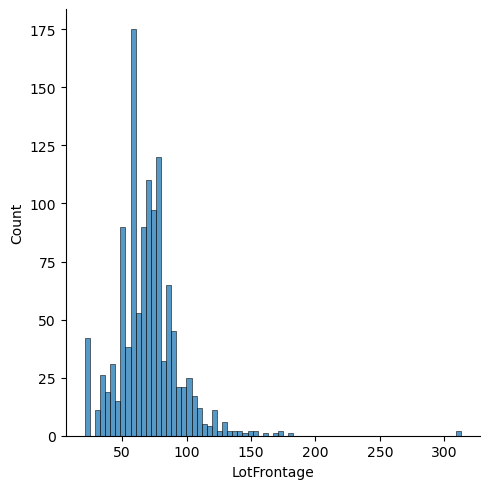

In [64]:
sns.displot(df['LotFrontage'], kde=False)

In [70]:
#Correlacion de cada variable
corr1 = df['OverallQual'].corr(df['SalePrice'])
corr2 = df['1stFlrSF'].corr(df['SalePrice'])
corr3 = df['TotRmsAbvGrd'].corr(df['SalePrice'])
corr4 = df['YearBuilt'].corr(df['SalePrice'])
corr5 = df['LotFrontage'].corr(df['SalePrice'])

print('Correlation coefficient Overall Quality:', corr1)
print('Correlation coefficient 1st Floor Rooms:', corr2)
print('Correlation coefficient Total Rooms Above Ground:', corr3)
print('Correlation coefficient Year Built:', corr4)
print('Correlation coefficient Lot Frontage:', corr5)

Correlation coefficient Overall Quality: 0.7909816005838047
Correlation coefficient 1st Floor Rooms: 0.6058521846919148
Correlation coefficient Total Rooms Above Ground: 0.5337231555820284
Correlation coefficient Year Built: 0.5228973328794969
Correlation coefficient Lot Frontage: 0.35179909657067804


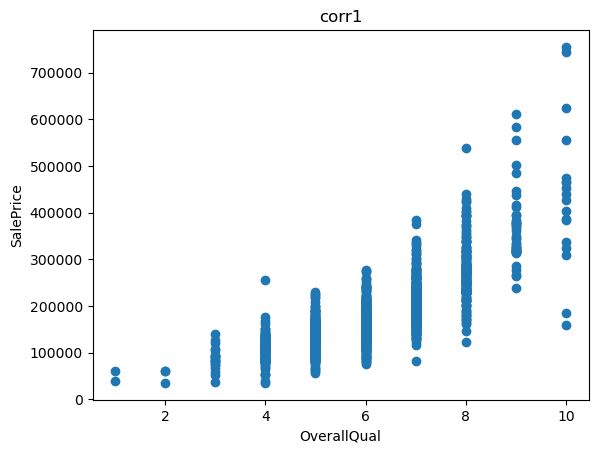

In [71]:
# Create a scatter plot of the data
plt.scatter(df['OverallQual'],(df['SalePrice']))

# Add axis labels and a title to the plot
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('corr1')

# Display the plot
plt.show()

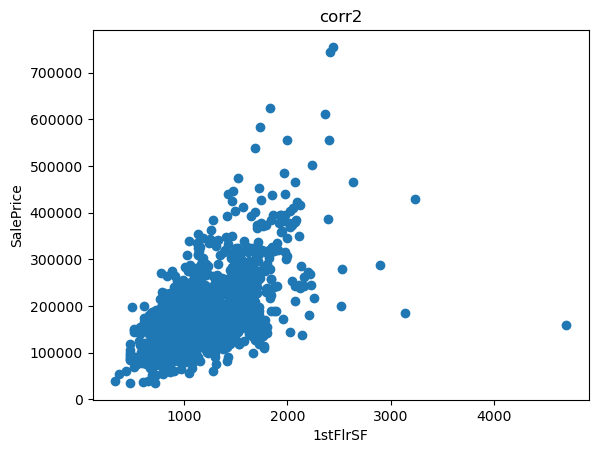

In [72]:
# Create a scatter plot of the data
plt.scatter(df['1stFlrSF'],(df['SalePrice']))

# Add axis labels and a title to the plot
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title('corr2')

# Display the plot
plt.show()

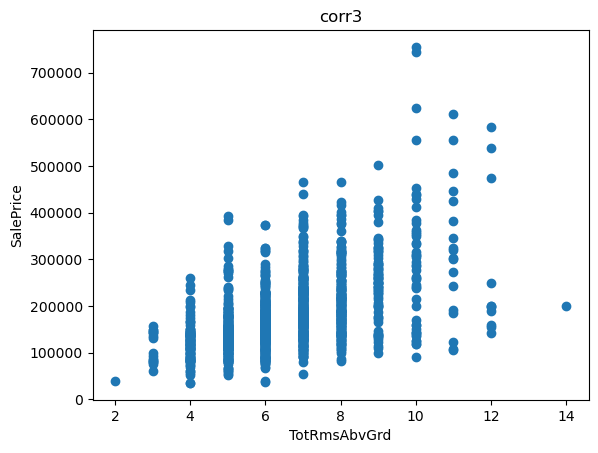

In [73]:
# Create a scatter plot of the data
plt.scatter(df['TotRmsAbvGrd'],(df['SalePrice']))

# Add axis labels and a title to the plot
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title('corr3')

# Display the plot
plt.show()

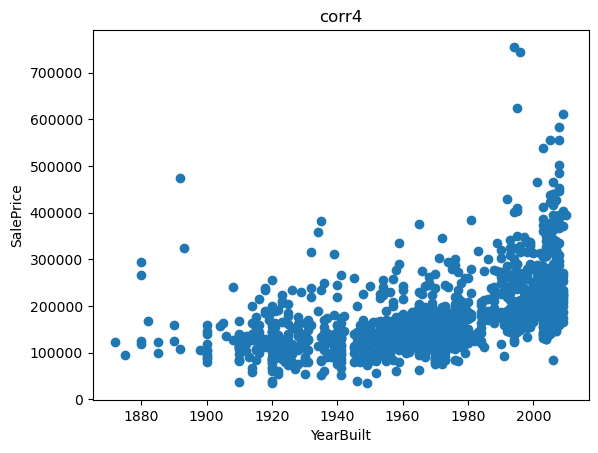

In [74]:
# Create a scatter plot of the data
plt.scatter(df['YearBuilt'],(df['SalePrice']))

# Add axis labels and a title to the plot
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('corr4')

# Display the plot
plt.show()

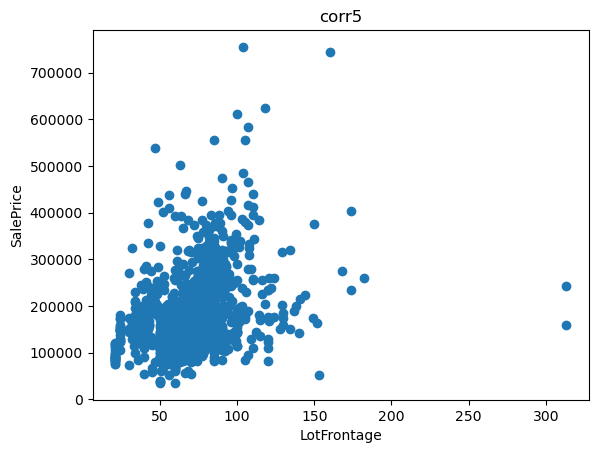

In [75]:
# Create a scatter plot of the data
plt.scatter(df['LotFrontage'],(df['SalePrice']))

# Add axis labels and a title to the plot
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('corr5')

# Display the plot
plt.show()

In [231]:
df1 = pd.DataFrame(train)
df1.rename(columns={0:'SalePrice',1:'OverallQual',2:'1stFlrSF',3:'TotRmsAbvGrd',4:'YearBuilt',5:'LotFrontage'}, inplace=True)

#La primera variable a probar es la que tiene una correlacion mayor, esto es OverallQual

b1 = 1 #0.005, 2000
b0 = 300
epochs = 5000
imprimir_error_cada = 1000
alpha = 0.001
y = df1['SalePrice'].values
y = y.reshape(-1,1)
x1 = df1['OverallQual'].values  #Obtengo solo los valores de la columna para trabajarlos como array
x1 =np.reshape(x1,[-1,1])  #lo cambio a vector columna
vect1 = np.ones_like(x1).reshape(-1,1) #Creo un vector columna de 1s
betas = np.array([[b1],[b0]])
A = np.hstack([x1,vect1]) #Genero una matriz con las dos columnas
err = np.zeros((epochs,4)) #Genero una matriz donde almaceno numero iter, error, betas

for i in range(epochs):
    yhat = np.matmul(A,betas) #y_ = B1*x_ + B0 , estimacion
    error = 0.5*np.mean(np.power(y-yhat,2)) #calculo el error cuadratico
    if i%imprimir_error_cada == 0: #imprimo el error de acuerdo a la variable imprimir
        print(f'El error de la iteracion {i} es: {error}')
    err[i,0] = i  #almaceno en mi matriz err
    err[i,1] = error
    delta_b0 = np.mean(yhat-y)  #se calcula deltaB0 y delta B1
    delta_b1 = np.mean(np.dot(yhat-y,x1.reshape(1,-1)))
    b0 = b0 - alpha*delta_b0 #Obtenemos los nuevos betas
    b1 = b1 - alpha*delta_b0
    betas = np.array([[b1],[b0]]) #los guardamos en el vector beta para la multiplicacion matricial
    err[i,2] = b0
    err[i,3] = b1





El error de la iteracion 0 es: 19354403872.19692
El error de la iteracion 1000 es: 1528023364.8553407
El error de la iteracion 2000 es: 1527237994.716581
El error de la iteracion 3000 es: 1527237372.3070855
El error de la iteracion 4000 es: 1527237371.8068974


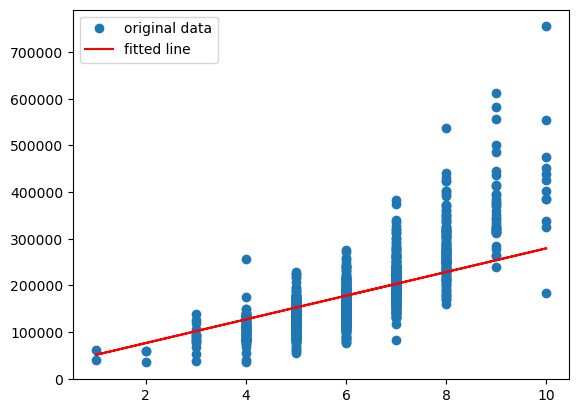

In [232]:
plt.plot(x1, y, 'o', label='original data')
plt.plot(x1, b0 + b1*x1, 'r', label='fitted line')
plt.legend()
plt.show()

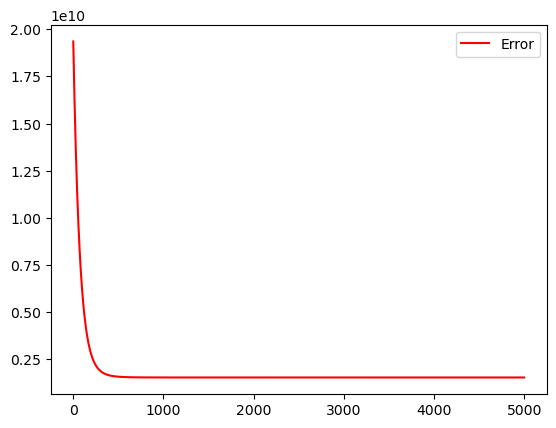

In [208]:

plt.plot(err[:,0], err[:,1], 'r', label='Error')
plt.legend()
plt.show()

In [234]:
b1 = 100 #0.005, 2000
b0 = 3
epochs = 5000
imprimir_error_cada = 1000
alpha = 0.001
y = df1['SalePrice'].values
y = y.reshape(-1,1)
x2 = df1['1stFlrSF'].values  #Obtengo solo los valores de la columna para trabajarlos como array
x2 =np.reshape(x2,[-1,1])  #lo cambio a vector columna
vect2 = np.ones_like(x2).reshape(-1,1) #Creo un vector columna de 1s
betas2 = np.array([[b1],[b0]])
B = np.hstack([x2,vect2]) #Genero una matriz con las dos columnas
err2 = np.zeros((epochs,4))

for i in range(epochs):
    yhat = np.matmul(B,betas2) #y_ = B1*x_ + B0
    error = 0.5*np.mean(np.power(y-yhat,2))
    if i%imprimir_error_cada == 0:
        print(f'El error de la iteracion {i} es: {error}')
    err2[i,0] = i
    err2[i,1] = error
    delta_b0 = np.mean(yhat-y)
    delta_b1 = np.mean(np.dot(yhat-y,x2.reshape(1,-1)))
    b0 = b0 - alpha*delta_b0
    b1 = b1 - alpha*delta_b0
    betas2 = np.array([[b1],[b0]])
    err2[i,2] = b0
    err2[i,3] = b1

El error de la iteracion 0 es: 4096811761.8039384
El error de la iteracion 1000 es: 1972444148.8303854
El error de la iteracion 2000 es: 1972444148.8303854
El error de la iteracion 3000 es: 1972444148.8303854
El error de la iteracion 4000 es: 1972444148.8303854


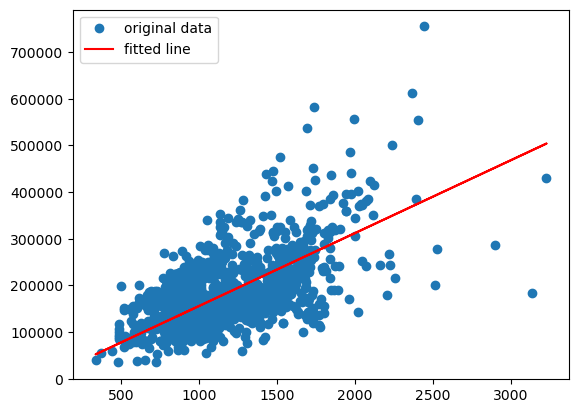

In [235]:
plt.plot(x2, y, 'o', label='original data')
plt.plot(x2, b0 + b1*x2, 'r', label='fitted line')
plt.legend()
plt.show()

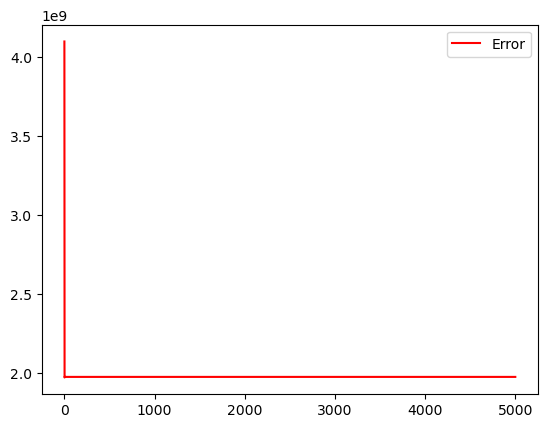

In [238]:
plt.plot(err2[:,0], err2[:,1], 'r', label='Error')
plt.legend()
plt.show()

In [122]:
# Calculate the linear regression parameters
slope, intercept, r, p, se = linregress(x1[:,0], y[:,0])

# Print the slope and intercept
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 45411.998779159134
Intercept: -96469.5713187397


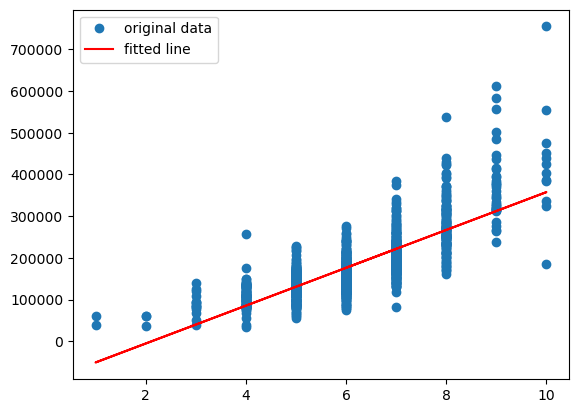

In [159]:
plt.plot(x1, y, 'o', label='original data')
plt.plot(x1, intercept + slope*x1, 'r', label='fitted line')
plt.legend()
plt.show()